# SET C
## Practical exam Ride Demand Forecasting Data Prep Engine

### Project Overview

To create a complete data preprocessing & feature engineering pipeline that prepares real-world ride-hailing trip data for downstream analytics and predictive modeling (e.g., ride demand forecasting, surge pricing prediction).

In [651]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as sns


# 1. Data Understanding & Loading

## Load json Dataset

In [652]:
df_json = pd.read_json("trips.json")


In [653]:
df_json.head(5)

,trip_id,rider_id,zone,distance_km,duration_min,fare_amount,payment_mode,ride_date,surge_flag
0,T00001,R0037,Zone_10,11.83,74.59,104.88,Cash,2023-11-13,0
1,T00002,R0104,Zone_9,3.86,35.59,40.48,Cash,2023-07-28,1
2,T00003,R0045,Zone_8,4.70,31.03,46.39,Cash,2024-01-14,1
3,T00004,R0089,Zone_2,11.06,59.48,257.64,Cash,2023-12-13,0
4,T00005,R0003,Zone_5,7.28,67.59,72.74,UPI,2023-03-15,1


In [654]:
df_json.tail(5)

,trip_id,rider_id,zone,distance_km,duration_min,fare_amount,payment_mode,ride_date,surge_flag
1995,T01996,R0171,Zone_6,0.91,6.44,22.12,UPI,2023-03-20,0
1996,T01997,R0287,Zone_5,11.40,103.03,193.75,Cash,2024-06-25,1
1997,T01998,R0254,Zone_9,4.94,39.32,58.45,Cash,2024-03-23,0
1998,T01999,R0267,Zone_2,7.76,51.43,74.92,UPI,2023-10-29,1
1999,T02000,R0202,Zone_10,12.02,114.45,149.05,Cash,2024-02-03,0


In [655]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   trip_id       2000 non-null   object 
 1   rider_id      2000 non-null   object 
 2   zone          2000 non-null   object 
 3   distance_km   2000 non-null   float64
 4   duration_min  2000 non-null   float64
 5   fare_amount   2000 non-null   float64
 6   payment_mode  2000 non-null   object 
 7   ride_date     2000 non-null   object 
 8   surge_flag    2000 non-null   int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 140.8+ KB


In [656]:
# Change datatype to ride date column to datetime
df_json["ride_date"] = pd.to_datetime(df_json["ride_date"])

In [657]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   trip_id       2000 non-null   object        
 1   rider_id      2000 non-null   object        
 2   zone          2000 non-null   object        
 3   distance_km   2000 non-null   float64       
 4   duration_min  2000 non-null   float64       
 5   fare_amount   2000 non-null   float64       
 6   payment_mode  2000 non-null   object        
 7   ride_date     2000 non-null   datetime64[ns]
 8   surge_flag    2000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 140.8+ KB


In [658]:
df_json.describe()

,distance_km,duration_min,fare_amount,ride_date,surge_flag
count,2000.000000,2000.000000,2000.000000,2000,2000.000000
mean,8.247420,61.883410,134.600375,2023-10-29 21:36:43.200000,0.510500
min,0.020000,0.190000,0.250000,2023-01-01 00:00:00,0.000000
25%,4.887500,35.415000,70.440000,2023-06-07 18:00:00,0.000000
50%,8.115000,58.950000,121.850000,2023-10-31 00:00:00,1.000000
75%,11.362500,85.375000,182.867500,2024-03-21 06:00:00,1.000000
max,25.860000,201.070000,472.290000,2024-08-23 00:00:00,1.000000
std,4.450904,35.980603,85.521989,NaN,0.500015


In [659]:
df_json.shape

(2000, 9)

In [660]:
df_json.isnull().sum()

trip_id         0
rider_id        0
zone            0
distance_km     0
duration_min    0
fare_amount     0
payment_mode    0
ride_date       0
surge_flag      0
dtype: int64

## Observation of JSON dataset
* There are 2000 rows and 9 columns in this dataset
* The column is dataset are - trip_id, rider_id, zone, distance_km, duration_min, fare_amount, payment_mode, ride_date, surge_flag
* They are no any missing value in this json dataset which we will read in detail and deal with later on in the notebook
* To change the column datatype to datetime 

# Load CSV Dataset

In [661]:
df_csv = pd.read_csv("dataset.csv.csv")

In [662]:
before = df_csv.head(5)

In [663]:
df_csv.tail(5)

,rider_id,name,age,gender,city,signup_date,total_rides,cancelled_rides,avg_rating
295,R0296,Reyansh Patel,NaN,Other,Hyderabad,2021-02-20,NaN,58.0,3.97
296,R0297,Saanvi Gupta,47.0,Male,Pune,2023-09-20,396.0,46.0,3.87
297,R0298,Vivaan Singh,35.0,Female,Ahmedabad,2020-03-25,65.0,11.0,3.88
298,R0299,Ishaan Gupta,33.0,Other,Kolkata,2020-09-04,NaN,NaN,3.92
299,R0300,Saanvi Iyer,38.0,Female,Kolkata,2023-07-08,291.0,7.0,3.67


In [664]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rider_id         300 non-null    object 
 1   name             300 non-null    object 
 2   age              270 non-null    float64
 3   gender           300 non-null    object 
 4   city             300 non-null    object 
 5   signup_date      300 non-null    object 
 6   total_rides      270 non-null    float64
 7   cancelled_rides  270 non-null    float64
 8   avg_rating       270 non-null    float64
dtypes: float64(4), object(5)
memory usage: 21.2+ KB


In [665]:

# Change datatype to signup date column to datetime 
df_csv["signup_date"] = pd.to_datetime(df_csv["signup_date"])

In [666]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   rider_id         300 non-null    object        
 1   name             300 non-null    object        
 2   age              270 non-null    float64       
 3   gender           300 non-null    object        
 4   city             300 non-null    object        
 5   signup_date      300 non-null    datetime64[ns]
 6   total_rides      270 non-null    float64       
 7   cancelled_rides  270 non-null    float64       
 8   avg_rating       270 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 21.2+ KB


In [667]:
df_csv.describe()

,age,signup_date,total_rides,cancelled_rides,avg_rating
count,270.000000,300,270.000000,270.000000,270.000000
mean,31.407407,2021-05-23 06:57:36,245.985185,22.940741,4.001074
min,18.000000,2019-01-01 00:00:00,4.000000,0.000000,3.000000
25%,26.000000,2020-03-04 00:00:00,117.500000,7.000000,3.562500
50%,31.000000,2021-05-11 00:00:00,244.500000,16.500000,3.935000
75%,37.000000,2022-09-14 18:00:00,362.750000,31.750000,4.487500
max,55.000000,2023-12-06 00:00:00,499.000000,94.000000,5.000000
std,7.899269,NaN,146.398574,21.003545,0.557858


In [668]:
df_csv.shape

(300, 9)

In [669]:
before_null = df_csv.isnull().sum()

In [670]:
df_csv.duplicated().sum()

np.int64(0)

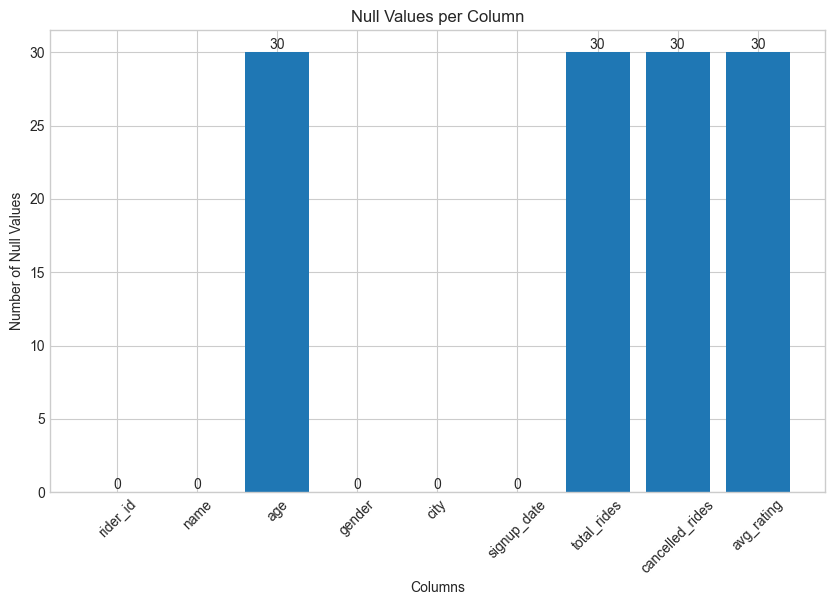

In [671]:
import matplotlib.pyplot as plt

null_counts = df_csv.isnull().sum()


plt.figure(figsize=(10, 6))
bar = plt.bar(null_counts.index, null_counts.values)
plt.bar_label(bar)
plt.xticks(rotation=45)
plt.xlabel("Columns")
plt.ylabel("Number of Null Values")
plt.title("Null Values per Column")
plt.show()


## Observation of csv dataset
* There are 300 rows and 9 columns in this dataset
* The column is dataset are - rider_id, name, age, gender, city, singup_date, total_rides, cancelled_rides, avg_rating 
* To change the datatype for signup column to datetime

## Missing value before

In [672]:
before_age_column = df_csv["age"].head(5)
before_total_rides_column = df_csv["total_rides"].head(5)
before_cancelled_rides_column = df_csv["cancelled_rides"].head(5)
before_avg_rating_column = df_csv["avg_rating"].head(5)


# 2. Data Cleaning

* Handle numeric missing values using SimpleImputer (mean).

In [673]:

# Fill null value with median value
age_column = df_csv["age"] = df_csv["age"].fillna(df_csv["age"].median())


In [674]:
# Fill null value with median value
total_rides = df_csv["total_rides"] = df_csv["total_rides"].fillna(df_csv["total_rides"].median())


In [675]:
cancelled_rides = df_csv["cancelled_rides"] = df_csv["cancelled_rides"].fillna(df_csv["cancelled_rides"].median())

In [676]:
#  Fill null value with mean value
avg_rating = df_csv["avg_rating"] = df_csv["avg_rating"].fillna(df_csv["avg_rating"].mean())

In [677]:
after_null = df_csv.isnull().sum()

* Fill null value with median value (age, total_rides, and cancelled_rides)

# 3. Outlier Handling

In [678]:
before_df_csv = df_csv

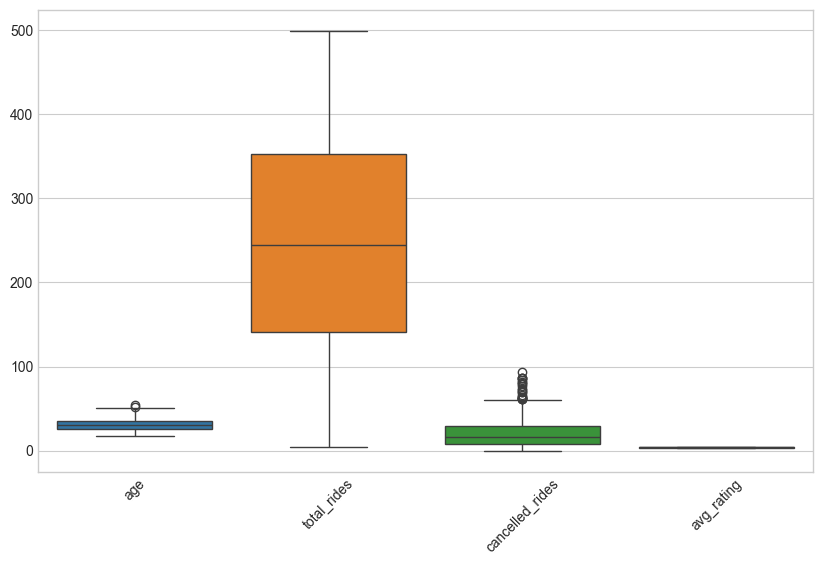

In [679]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(before_df_csv)
plt.xticks(rotation=45)
plt.show()

## IQR Method

In [680]:
Q1 = df_csv["cancelled_rides"].quantile(0.25)
Q3 = df_csv["cancelled_rides"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Lower Limit:", lower)
print("Upper Limit:", upper)

# Outliers count
outliers = df_csv[(df_csv["cancelled_rides"] < lower) | (df_csv["cancelled_rides"] > upper)]
print("Number of outliers:", len(outliers))


Lower Limit: -23.5
Upper Limit: 60.5
Number of outliers: 21


## Caping Method

In [681]:
df_csv["cancelled_rides"] = df_csv["cancelled_rides"].clip(lower, upper)


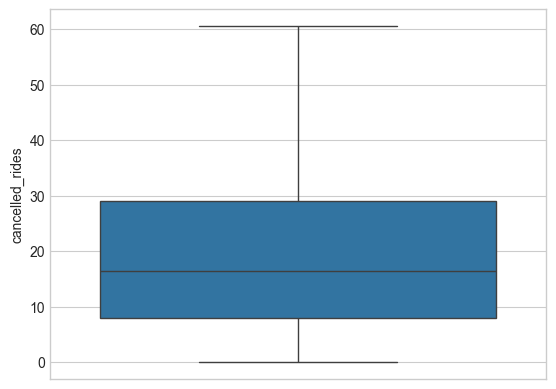

In [682]:
sns.boxplot(df_csv["cancelled_rides"])
plt.show()

In [683]:
after_df_csv = df_csv

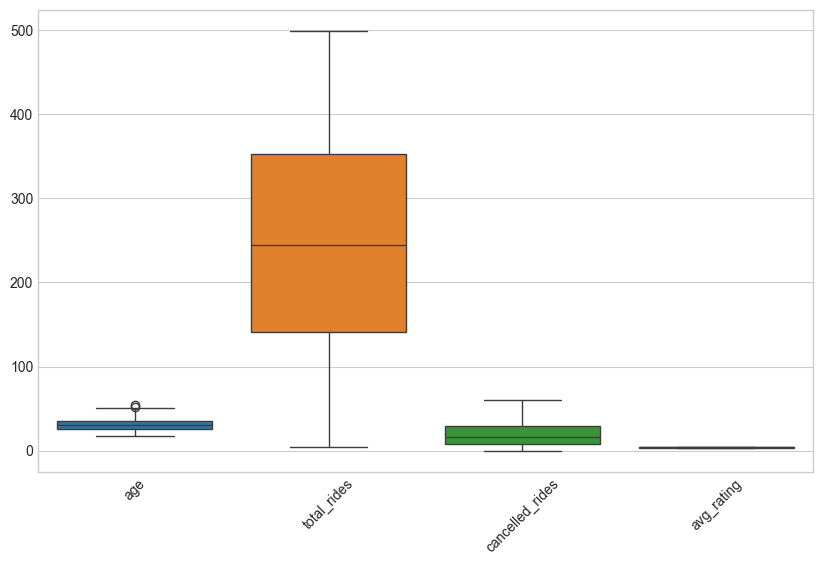

In [684]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(after_df_csv)
plt.xticks(rotation=45)
plt.show()

* Find the outlier only one column(cancelled_rides)

# 4. Data Transformation

## Extract the day to signup date column

In [685]:
df_csv["day"] = df_csv["signup_date"].dt.day

df_csv.head(5)

,rider_id,name,age,gender,city,signup_date,total_rides,cancelled_rides,avg_rating,day
0,R0001,Aarav Das,23.0,Male,Pune,2020-06-29,56.0,0.0,3.760000,29
1,R0002,Ishaan Nair,39.0,Female,Mumbai,2019-11-23,70.0,5.0,4.120000,23
2,R0003,Kavya Reddy,34.0,Male,Pune,2023-05-04,244.5,9.0,4.001074,4
3,R0004,Aarav Nair,19.0,Other,Kolkata,2019-07-28,464.0,5.0,3.190000,28
4,R0005,Diya Reddy,27.0,Male,Ahmedabad,2021-05-31,294.0,30.0,3.530000,31


## Extract the month to signup date column

In [686]:

df_csv["month"] = df_csv["signup_date"].dt.month

df_csv.head(5)

,rider_id,name,age,gender,city,signup_date,total_rides,cancelled_rides,avg_rating,day,month
0,R0001,Aarav Das,23.0,Male,Pune,2020-06-29,56.0,0.0,3.760000,29,6
1,R0002,Ishaan Nair,39.0,Female,Mumbai,2019-11-23,70.0,5.0,4.120000,23,11
2,R0003,Kavya Reddy,34.0,Male,Pune,2023-05-04,244.5,9.0,4.001074,4,5
3,R0004,Aarav Nair,19.0,Other,Kolkata,2019-07-28,464.0,5.0,3.190000,28,7
4,R0005,Diya Reddy,27.0,Male,Ahmedabad,2021-05-31,294.0,30.0,3.530000,31,5


## Extract the year to signup date column

In [687]:

df_csv["year"] = df_csv["signup_date"].dt.year

df_csv.head(5)


,rider_id,name,age,gender,city,signup_date,total_rides,cancelled_rides,avg_rating,day,month,year
0,R0001,Aarav Das,23.0,Male,Pune,2020-06-29,56.0,0.0,3.760000,29,6,2020
1,R0002,Ishaan Nair,39.0,Female,Mumbai,2019-11-23,70.0,5.0,4.120000,23,11,2019
2,R0003,Kavya Reddy,34.0,Male,Pune,2023-05-04,244.5,9.0,4.001074,4,5,2023
3,R0004,Aarav Nair,19.0,Other,Kolkata,2019-07-28,464.0,5.0,3.190000,28,7,2019
4,R0005,Diya Reddy,27.0,Male,Ahmedabad,2021-05-31,294.0,30.0,3.530000,31,5,2021


# Convert gender column to 0 or 1 (Lable Encode)

In [688]:
from sklearn.preprocessing import LabelEncoder

In [689]:
le = LabelEncoder()
df_csv["gender"] = le.fit_transform(df_csv["gender"])

# 6. Feature Construction

In [690]:
df_csv["ride_cancellation_rate"] = (df_csv["cancelled_rides"] / df_csv["total_rides"]) * 100

In [691]:
df_csv.head(5)

,rider_id,name,age,gender,city,signup_date,total_rides,cancelled_rides,avg_rating,day,month,year,ride_cancellation_rate
0,R0001,Aarav Das,23.0,1,Pune,2020-06-29,56.0,0.0,3.760000,29,6,2020,0.000000
1,R0002,Ishaan Nair,39.0,0,Mumbai,2019-11-23,70.0,5.0,4.120000,23,11,2019,7.142857
2,R0003,Kavya Reddy,34.0,1,Pune,2023-05-04,244.5,9.0,4.001074,4,5,2023,3.680982
3,R0004,Aarav Nair,19.0,2,Kolkata,2019-07-28,464.0,5.0,3.190000,28,7,2019,1.077586
4,R0005,Diya Reddy,27.0,1,Ahmedabad,2021-05-31,294.0,30.0,3.530000,31,5,2021,10.204082


# 7. Final Dataset

* Produce summary table:
* Rows before vs after cleaning
* Missing values before vs after
* Outliers before vs after
* of new engineered features


## Rows before vs after cleaning

In [692]:
#  Rows before vs after
print(before.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rider_id         5 non-null      object 
 1   name             5 non-null      object 
 2   age              5 non-null      float64
 3   gender           5 non-null      object 
 4   city             5 non-null      object 
 5   signup_date      5 non-null      object 
 6   total_rides      4 non-null      float64
 7   cancelled_rides  5 non-null      float64
 8   avg_rating       4 non-null      float64
dtypes: float64(4), object(5)
memory usage: 492.0+ bytes
None


In [693]:
print(df_csv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   rider_id                300 non-null    object        
 1   name                    300 non-null    object        
 2   age                     300 non-null    float64       
 3   gender                  300 non-null    int64         
 4   city                    300 non-null    object        
 5   signup_date             300 non-null    datetime64[ns]
 6   total_rides             300 non-null    float64       
 7   cancelled_rides         300 non-null    float64       
 8   avg_rating              300 non-null    float64       
 9   day                     300 non-null    int32         
 10  month                   300 non-null    int32         
 11  year                    300 non-null    int32         
 12  ride_cancellation_rate  300 non-null    float64   

## Missing values before vs after

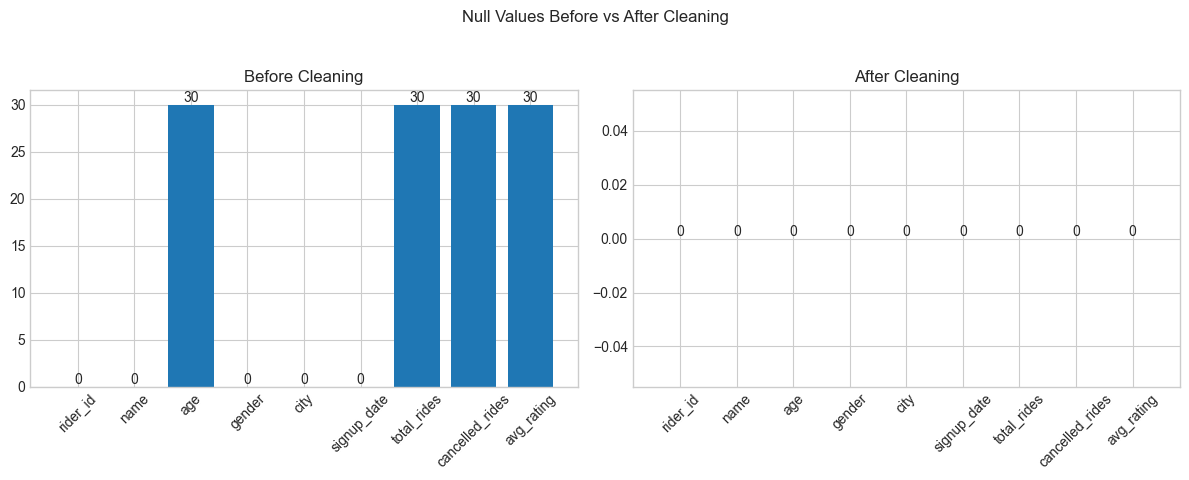

In [694]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plt.suptitle("Null Values Before vs After Cleaning")

# Before
bar = axes[0].bar(before_null.index, before_null.values)
axes[0].set_title("Before Cleaning")
axes[0].tick_params(axis='x', rotation=45)
axes[0].bar_label(bar)

# After
bar = axes[1].bar(after_null.index, after_null.values)
axes[1].set_title("After Cleaning")
axes[1].tick_params(axis='x', rotation=45)
axes[1].bar_label(bar)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Outliers before vs after

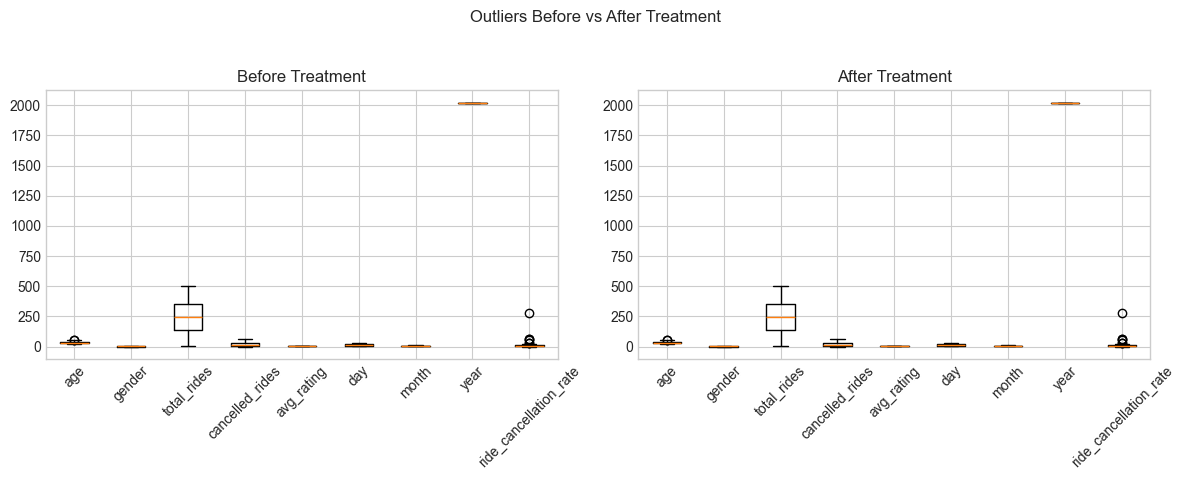

In [695]:
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_before = before_df_csv.select_dtypes(include='number')
numeric_after = after_df_csv.select_dtypes(include='number')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plt.suptitle("Outliers Before vs After Treatment")

# Before
axes[0].boxplot(numeric_before.values)
axes[0].set_title("Before Treatment")
axes[0].set_xticklabels(numeric_before.columns, rotation=45)

# After
axes[1].boxplot(numeric_after.values)
axes[1].set_title("After Treatment")
axes[1].set_xticklabels(numeric_after.columns, rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Export Final Dataset

In [696]:
after_df_csv.to_csv("final_cleaned_dataset.csv", index=False)


In [697]:
final_dataset = pd.read_csv("final_cleaned_dataset.csv")
final_dataset.head(5)

,rider_id,name,age,gender,city,signup_date,total_rides,cancelled_rides,avg_rating,day,month,year,ride_cancellation_rate
0,R0001,Aarav Das,23.0,1,Pune,2020-06-29,56.0,0.0,3.760000,29,6,2020,0.000000
1,R0002,Ishaan Nair,39.0,0,Mumbai,2019-11-23,70.0,5.0,4.120000,23,11,2019,7.142857
2,R0003,Kavya Reddy,34.0,1,Pune,2023-05-04,244.5,9.0,4.001074,4,5,2023,3.680982
3,R0004,Aarav Nair,19.0,2,Kolkata,2019-07-28,464.0,5.0,3.190000,28,7,2019,1.077586
4,R0005,Diya Reddy,27.0,1,Ahmedabad,2021-05-31,294.0,30.0,3.530000,31,5,2021,10.204082


In [698]:
final_dataset.tail()

,rider_id,name,age,gender,city,signup_date,total_rides,cancelled_rides,avg_rating,day,month,year,ride_cancellation_rate
295,R0296,Reyansh Patel,31.0,2,Hyderabad,2021-02-20,244.5,58.0,3.97,20,2,2021,23.721881
296,R0297,Saanvi Gupta,47.0,1,Pune,2023-09-20,396.0,46.0,3.87,20,9,2023,11.616162
297,R0298,Vivaan Singh,35.0,0,Ahmedabad,2020-03-25,65.0,11.0,3.88,25,3,2020,16.923077
298,R0299,Ishaan Gupta,33.0,2,Kolkata,2020-09-04,244.5,16.5,3.92,4,9,2020,6.748466
299,R0300,Saanvi Iyer,38.0,0,Kolkata,2023-07-08,291.0,7.0,3.67,8,7,2023,2.405498


In [699]:
final_dataset.describe()

,age,gender,total_rides,cancelled_rides,avg_rating,day,month,year,ride_cancellation_rate
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,31.366667,0.946667,245.836667,21.371667,4.001074,15.903333,6.223333,2020.916667,10.438893
std,7.493513,0.799554,138.860791,17.592214,0.529132,9.064650,3.377100,1.391465,17.133146
min,18.000000,0.000000,4.000000,0.000000,3.000000,1.000000,1.000000,2019.000000,0.000000
25%,26.000000,0.000000,140.750000,8.000000,3.600000,8.000000,3.000000,2020.000000,4.492654
50%,31.000000,1.000000,244.500000,16.500000,4.001074,15.500000,6.000000,2021.000000,8.395554
75%,36.000000,2.000000,353.000000,29.000000,4.422500,24.000000,9.000000,2022.000000,13.337517
max,55.000000,2.000000,499.000000,60.500000,5.000000,31.000000,12.000000,2023.000000,275.000000


In [700]:
final_dataset.shape

(300, 13)

# 8. Bonus (Optional)

* Auto-generate Pandas/YData Profiling EDA report

In [701]:
from ydata_profiling import ProfileReport

report = ProfileReport(after_df_csv)

report.to_file("report.html")

Summarize dataset:  75%|███████▌  | 15/20 [00:00<00:00, 58.64it/s, Calculate auto correlation]               c:\Users\BAPS\AppData\Local\Programs\Python\Python313\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[9 7 0 8 9 9 8 0 4 4 4 5 0 2 5 7 5 2 0 5 2 4 2 2 6 5 1 3 7 2 8 6 6 7 6 4 6
 3 5 1 3 6 2 0 3 4 1 9 5 1 1 2 4 9 1 8 0 9 0 0 6 3 6 9 8 0 7 9 0 0 2 1 5 3
 9 0 1 0 7 4 9 8 9 6 5 2 3 1 6 9 4 5 9 3 1 8 7 9 6 7 0 3 7 8 8 7 3 9 5 0 1
 3 2 7 0 2 3 8 1 3 3 6 7 2 6 7 5 2 2 4 6 2 3 9 7 5 2 8 2 5 2 0 8 9 2 4 9 9
 4 8 7 0 0 7 2 1 7 8 6 4 8 4 6 1 2 4 7 2 6 6 3 7 4 1 5 7 4 4 3 0 2 9 8 0 8
 3 1 4 4 7 4 7 0 2 8 7 2 2 0 4 1 8 7 0 3 7 1 2 3 0 0 3 0 4 8 0 0 3 3 5 3 8
 9 0 4 9 3 5 7 6 8 2 7 0 4 2 3 6 3 5 3 1 1 6 0 9 3 7 7 0 3 7 5 2 1 7 3 9 7
 5 8 6 9 1 8 7 0 4 5 0 1 4 5 5 0 1 6 0 6 9 4 0 4 9 2 4 5 9 9 1 5 8 0 0 9 6
 6 7 0 2]' has dtype incompatible with int32, p

# Understanding the Data Landscape

## The project began with two primary datasets:

   2. Trip Dataset (JSON format) – Containing 2000 records of ride-level information such as trip ID, rider ID, zone, distance, duration, fare amount, payment mode, ride date, and surge flag.

   1. Rider Dataset (CSV format) – Containing 300 rider profiles including age, gender, city, signup date, total rides, cancelled rides, and average rating.

An initial exploratory analysis was conducted to evaluate structure, data types, statistical distributions, and completeness. While the trip dataset was clean and free of missing values, the rider dataset contained several missing entries in key numerical fields. Addressing these inconsistencies was essential before proceeding further.

# Data Cleaning and Preparation

## Data quality directly influences model performance. Therefore, systematic cleaning was performed:

* Missing values in age, total rides, and cancelled rides were imputed using the median to minimize the impact of skewness and outliers.

* Missing values in average rating were filled using the mean to maintain distribution consistency.

After imputation, the dataset was re-evaluated to ensure completeness. All missing values were successfully handled, resulting in a consistent and reliable dataset.

# Outlier Detection and Treatment

To maintain statistical robustness, outlier analysis was conducted using boxplots and the Interquartile Range (IQR) method. Significant outliers were identified, particularly in the cancelled rides column.

Rather than removing records—which could reduce dataset representativeness—capping was applied using IQR-based thresholds. This approach preserved the integrity of the data while preventing extreme values from distorting future modeling results.

# Feature Transformation

Date-related fields were converted into structured datetime formats. From the rider signup date, additional features were extracted:

* Signup day

* Signup month

* Signup year

These derived features enable temporal analysis and can improve forecasting accuracy.

Additionally, categorical variables such as gender were encoded into numeric format to ensure compatibility with machine learning algorithms.

# Feature Engineering

Beyond cleaning and transformation, the project emphasized meaningful feature creation. A new metric—Ride Cancellation Rate—was developed using the formula:

Cancelled Rides ÷ Total Rides × 100

This feature provides behavioral insight into rider reliability and engagement patterns. Such engineered features often contribute significantly to predictive model performance.

# Final Outcome

By the end of the pipeline development, the dataset was:

* Clean and complete

* Statistically balanced

* Free from unhandled missing values

* Adjusted for outliers

* Enhanced with new time-based and behavioral features

The finalized dataset was exported and made ready for downstream analytics and machine learning applications.